In [86]:

import tweepy
import pandas as pd
import numpy as np

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
consumer_key='0RPVMWgT3f38gtSYrKTmV6l6x'
consumer_secret='8KWXf50tdxyFa2oQzJAoJM58UDtPt0zztQeOp2bcIbDGARtsLH'
access_token='access token here'access_token_secret='access token  secret here'def twitter_setup():
    auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_token,access_token_secret)
    api = tweepy.API(auth)
    return api


In [89]:

extractor = twitter_setup()

tweets = extractor.user_timeline(screen_name="Facebook", count = 1000)
print("number of tweets extracted: {}.\n".format(len(tweets)))

print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

number of tweets extracted: 200.

5 recent tweets:

Thanks @LinkedIn for recognizing us as the #2 Top Company in 2019! #facebooklife https://t.co/KEuhe8CTvj https://t.co/ypAoaPOzhD

@yoongistits Hi there. If you can't reset your password because you can't access the email on your account, learn a… https://t.co/LSDgjBc2BT

@timp_brown Hi Tim. Reports from people on Facebook help us identify and fix problems when something's not working… https://t.co/k07nLMSHcQ

@Pushpen60132973 Hi Pushpendra. Here are some things you can try to get back into your account so you can reset you… https://t.co/yxdpbfILA4

@Twanyin Hi Wanyin. Please reach out to the Facebook Business Page about what you're experiencing with your ad here… https://t.co/n9uW13KQai



In [90]:

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

display(data.head(10))

,tweets
0,Thanks @LinkedIn for recognizing us as the #2 ...
1,@yoongistits Hi there. If you can't reset your...
2,@timp_brown Hi Tim. Reports from people on Fac...
3,@Pushpen60132973 Hi Pushpendra. Here are some ...
4,@Twanyin Hi Wanyin. Please reach out to the Fa...
5,@alexiswoods Hi there. We first recommend upda...
6,"@MissJillTracey Thanks for sharing, Jill! -KN"
7,@PKYego_ Hi there. You can learn more about th...
8,@pankajm77156709 Hi Pankaj. If you can't reset...
9,@capt_otieno Hi there. You can find out how to...


In [91]:

# We print info from the first tweet:

print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1113549450025132032
2019-04-03 21:10:52
Twitter Web Client
144
30
None
None
{'hashtags': [{'text': 'facebooklife', 'indices': [67, 80]}], 'symbols': [], 'user_mentions': [{'screen_name': 'LinkedIn', 'name': 'LinkedIn', 'id': 13058772, 'id_str': '13058772', 'indices': [7, 16]}], 'urls': [{'url': 'https://t.co/KEuhe8CTvj', 'expanded_url': 'http://www.fb.careers/apply', 'display_url': 'fb.careers/apply', 'indices': [81, 104]}, {'url': 'https://t.co/ypAoaPOzhD', 'expanded_url': 'https://twitter.com/LinkedIn/status/1113497257838563331', 'display_url': 'twitter.com/LinkedIn/statu…', 'indices': [105, 128]}]}


In [92]:

# We add relevant data
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

In [94]:
display(data.head(10))
list(data)

,tweets,len,ID,Date,Source,Likes,RTs
0,Thanks @LinkedIn for recognizing us as the #2 ...,128,1113549450025132032,2019-04-03 21:10:52,Twitter Web Client,144,30
1,@yoongistits Hi there. If you can't reset your...,140,1113525690689818625,2019-04-03 19:36:27,Spredfast app,0,0
2,@timp_brown Hi Tim. Reports from people on Fac...,139,1113525598603943937,2019-04-03 19:36:05,Spredfast app,0,0
3,@Pushpen60132973 Hi Pushpendra. Here are some ...,140,1113525421113585664,2019-04-03 19:35:23,Spredfast app,0,0
4,@Twanyin Hi Wanyin. Please reach out to the Fa...,140,1113525285276745731,2019-04-03 19:34:50,Spredfast app,0,0
5,@alexiswoods Hi there. We first recommend upda...,140,1113525115793354753,2019-04-03 19:34:10,Spredfast app,0,0
6,"@MissJillTracey Thanks for sharing, Jill! -KN",45,1113524929104875520,2019-04-03 19:33:26,Spredfast app,0,0
7,@PKYego_ Hi there. You can learn more about th...,131,1113524837551677440,2019-04-03 19:33:04,Spredfast app,0,0
8,@pankajm77156709 Hi Pankaj. If you can't reset...,140,1113213536501678080,2019-04-02 22:56:04,Spredfast app,3,10
9,@capt_otieno Hi there. You can find out how to...,124,1113211900286910464,2019-04-02 22:49:34,Spredfast app,0,0


['tweets', 'len', 'ID', 'Date', 'Source', 'Likes', 'RTs']

In [23]:

# Visualization and basic stats

# We extract the mean of length

mean = np.mean(data['len'])
print("the length's average in tweets: {}".format(mean))

the length's average in tweets: 125.825


In [24]:

# We extract the tweet with more FAVs and mote RTs:

fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("the tweet with more likes is: \n{}".format(data['tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} character.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} character.\n".format(data['len'][rt]))

the tweet with more likes is: 
We’re aware that some people are currently having trouble accessing the Facebook family of apps. We’re working to r… https://t.co/A1BEzjeSUc
Number of likes: 49566
140 character.

The tweet with more retweets is: 
We’re aware that some people are currently having trouble accessing the Facebook family of apps. We’re working to r… https://t.co/A1BEzjeSUc
Number of retweets: 20009
140 character.



In [25]:

tlen = pd.Series(data = data['len'].values)   #, index=data['Data'])
tfav = pd.Series(data = data['Likes'].values)   #, index=data['Data'])
tret = pd.Series(data = data['RTs'].values) #, index=data['Data']

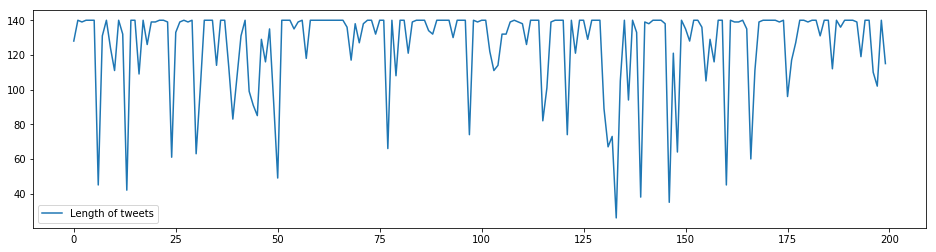

In [26]:
tlen.plot(figsize=(16,4), label="Length of tweets", legend=True)

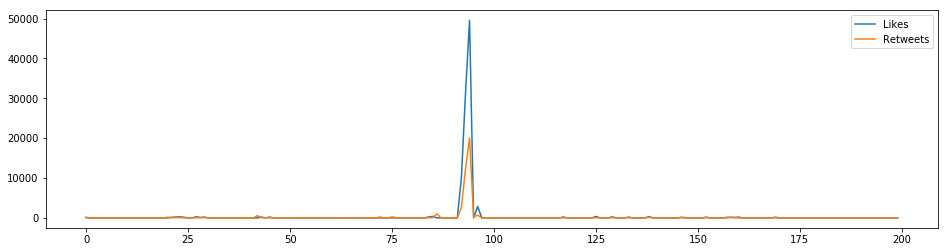

In [27]:

# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [28]:

# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter Web Client
* Spredfast app
* Twitter for iPhone
* TweetDeck


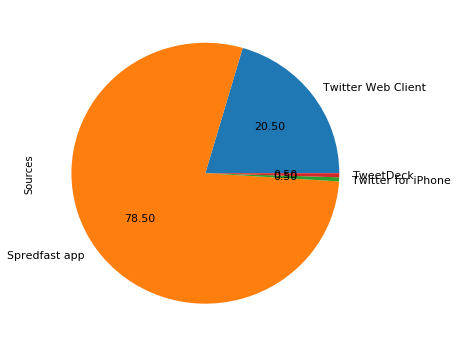

In [29]:

# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [30]:

from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    

In [31]:
l=[]
for k in data.tweets:
    l.append(analize_sentiment(k))
data['SA'] = l


In [32]:

# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['SA'][index] < 0]

In [33]:

# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['tweets'])))

Percentage of positive tweets: 51.0%
Percentage of neutral tweets: 37.0%
Percentage de negative tweets: 12.0%


In [34]:
data.to_csv('/home/aakash/Desktop/BTP_2/data.csv')

In [35]:
l=[]
import datetime
for i in range(len(data)):
    l.append(str(data["Date"][i].date()))       # for particular date 0-31 .strftime("%d")
data["new_date"]=l


In [36]:
df=data.loc[:, ["tweets", "new_date"]]

In [37]:
d={}
for i in range(len(df)):
    if df['new_date'][i] in df:
        d[df['new_date'][i]].append(df['tweets'][i])
    else:
        d[df['new_date'][i]]=[]
        d[df['new_date'][i]].append(df['tweets'][i])



In [38]:
df_1=pd.DataFrame.from_dict(d, orient='index')
df_1.index.name = 'Date'
df_1=df_1.reset_index()
df_1 = df_1.rename(columns={0: 'tweets_on_that_day'})

In [39]:
df_1

,Date,tweets_on_that_day
0,2019-04-03,@PKYego_ Hi there. You can learn more about th...
1,2019-04-02,@RaoSunilkumar0 Hi there. If you think your fr...
2,2019-04-01,Not sure why you're seeing a certain post in y...
3,2019-03-30,Congrats to the @RedTableTalk team!!! https://...
4,2019-03-29,Thank you to the @HRC for naming Facebook a “B...
5,2019-03-28,@jakethejeep Hi John. Reports from people on F...
6,2019-03-27,RT @people: Facebook Introduces New Measures t...
7,2019-03-26,@SunilShankarJ1 We're sorry to hear about this...
8,2019-03-25,RT @CNET: How Facebook helps people with HIV s...
9,2019-03-22,@AashiqMachar Hi Aashiq. Please reach out to t...


In [40]:
l=[]
for k in df_1.tweets_on_that_day:
    l.append(analize_sentiment(k))
df_1['SA'] = l

In [41]:
df_1[15:25]

,Date,tweets_on_that_day,SA
15,2019-03-13,RT @WIRED: For all the progress VR has made ov...,-1
16,2019-03-12,@3lechi Hi there. If you believe your account ...,1
17,2019-03-11,"@rosariomagos Thanks for sharing, Rosario. We'...",1
18,2019-03-09,@moigeshmarion Hi Marion. If you're having tro...,-1
19,2019-03-08,"Everyday, women are building meaningful commun...",1
20,2019-03-07,@AmandaWaterma11 Hi there. If you're having tr...,-1
21,2019-03-06,Sharing a note from Mark Zuckerberg: “A Privac...,1
22,2019-03-05,@GraceSimmons94 Hi Grace. Please reach out to ...,0
23,2019-03-04,love this 😊 https://t.co/Tl2jSg6cPQ,1
24,2019-03-02,RT @instagram: Participate in this weekend’s h...,0


In [42]:
# now drop columns
df_1=df_1.drop(['tweets_on_that_day'], axis=1)

In [43]:
df_1.head()

,Date,SA
0,2019-04-03,1
1,2019-04-02,1
2,2019-04-01,1
3,2019-03-30,0
4,2019-03-29,1


In [44]:
data_1=pd.read_csv("/home/aakash/Desktop/BTP_2/data_2019_1_1.csv")

In [45]:
data_1.head()

,Date,Open,High,Low,Close,Volume
0,1/2/2019 16:00:00,128.99,137.51,128.56,135.68,28146193
1,1/3/2019 16:00:00,134.69,137.17,131.12,131.74,22717948
2,1/4/2019 16:00:00,134.01,138.00,133.75,137.95,29002059
3,1/7/2019 16:00:00,137.56,138.87,135.91,138.05,20089337
4,1/8/2019 16:00:00,139.89,143.14,139.54,142.53,26263793


In [46]:
from datetime import datetime
l=[]
for i in range(len(data_1)):
    l.append(datetime.strptime(data_1.Date[i].split(" ")[0].strip(), '%m/%d/%Y').strftime('%Y-%m-%d'))
data_1["Date"]=l


In [47]:
data_1.head()

,Date,Open,High,Low,Close,Volume
0,2019-01-02,128.99,137.51,128.56,135.68,28146193
1,2019-01-03,134.69,137.17,131.12,131.74,22717948
2,2019-01-04,134.01,138.00,133.75,137.95,29002059
3,2019-01-07,137.56,138.87,135.91,138.05,20089337
4,2019-01-08,139.89,143.14,139.54,142.53,26263793


In [48]:
df2 = df_1.merge(data_1,on="Date",how="right")
df2=df2.fillna(0)
df2=df2.sort_values(by=['Date'])
df2=df2.reset_index()
df2=df2.drop(['index'], axis=1)
            
            
            
        

In [49]:
df2.tail()



,Date,SA,Open,High,Low,Close,Volume
56,2019-03-25,0.0,163.00,166.54,162.00,166.29,12631230
57,2019-03-26,-1.0,167.35,169.45,166.35,167.68,15437920
58,2019-03-27,1.0,167.85,168.94,164.79,165.87,10620299
59,2019-03-28,0.0,164.57,166.72,163.33,165.55,10689171
60,2019-03-29,1.0,166.39,167.19,164.81,166.69,13455454


# EDA

# Univariate Analysis

In [50]:
from pandas import Series, DataFrame
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [51]:
df2.dtypes

Date       object
SA        float64
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [52]:
data_1.isnull().sum()     # No missing values

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [53]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Box(
    y =df2["Open"],
    name = "All Points",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace1 = go.Box(
    y = df2["Open"],
    name = "Only Whiskers",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

trace2 = go.Box(
    y = df2["Open"],
    name = "Suspected Outliers",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

trace3 = go.Box(
    y = df2["Open"],
    name = "Whiskers and Outliers",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)')
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
    title = "Box Plot Styling Outliers for Attribute Open"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Box Plot Styling Outliers for Attribute Open")



In [54]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Box(
    y =df2["Close"],
    name = "All Points",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace1 = go.Box(
    y = df2["Close"],
    name = "Only Whiskers",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

trace2 = go.Box(
    y = df2["Close"],
    name = "Suspected Outliers",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

trace3 = go.Box(
    y = df2["Close"],
    name = "Whiskers and Outliers",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)')
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
    title = "Box Plot Styling Outliers for Attribute Close"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Box Plot Styling Outliers for Attribute Close")



In [55]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Box(
    y =df2["High"],
    name = "All Points",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace1 = go.Box(
    y = df2["High"],
    name = "Only Whiskers",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

trace2 = go.Box(
    y = df2["High"],
    name = "Suspected Outliers",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

trace3 = go.Box(
    y = df2["High"],
    name = "Whiskers and Outliers",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)')
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
    title = "Box Plot Styling Outliers for Attribute High"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Box Plot Styling Outliers for Attribute High")



In [56]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Box(
    y =df2["Low"],
    name = "All Points",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace1 = go.Box(
    y = df2["Low"],
    name = "Only Whiskers",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

trace2 = go.Box(
    y = df2["Low"],
    name = "Suspected Outliers",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

trace3 = go.Box(
    y = df2["Low"],
    name = "Whiskers and Outliers",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)')
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
    title = "Box Plot Styling Outliers for Attribute Low"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Box Plot Styling Outliers for Attribute Low")



In [59]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Box(
    y =df2["Volume"],
    name = "All Points",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace1 = go.Box(
    y = df2["Volume"],
    name = "Only Whiskers",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

trace2 = go.Box(
    y = df2["Volume"],
    name = "Suspected Outliers",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

trace3 = go.Box(
    y = df2["Volume"],
    name = "Whiskers and Outliers",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)')
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
    title = "Box Plot Styling Outliers for Attribute Volume"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Box Plot Styling Outliers for Attribute Volume")



# Bi-variate Analysis

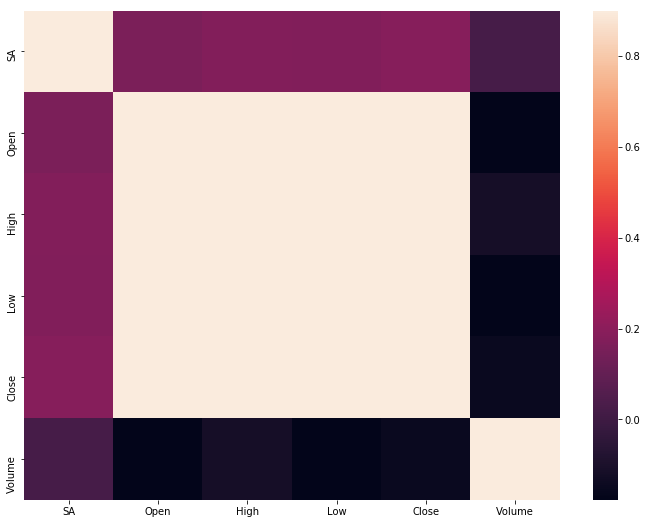

In [60]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9);

In [62]:

# Create traces
trace0 = go.Scatter(
    y = df2["Open"],
    x = df2["Date"],
    mode = 'markers+lines',
    name = 'Open Value',
    marker={"size": 2}
)
trace1 = go.Scatter(
    y = df2["Close"],
    x = df2["Date"],
    mode = 'lines+markers',
    name = 'Close Value',
    marker={"size": 3.5}
)
trace2 = go.Scatter(
    y = df2["High"],
    x = df2["Date"],
    mode = 'lines',
    name = 'High Value',
    marker={"size": 3}
)
trace3 = go.Scatter(
    y = df2["Low"],
    x = df2["Date"],
    mode = 'lines',
    name = 'Low Value',
    marker={"size": 3.5}
)

data = [trace0, trace1, trace2,trace3]

layout= go.Layout(
    title= 'Visualizing Attributes Open, Close ,High, Low',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Dates',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Open Value, Close Value ,High Value, Low Value',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='scatter-mode')

In [63]:
trace0 = go.Scatter(
    y = df2["Volume"],
    x = df2["Date"],
    mode = 'lines',
    name = 'Stock Volume',
    marker={"size": 3.5}
)
layout= go.Layout(
    title= 'Visualization of Volume Attribute',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Dates',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'FB Stock Volume',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = dict(data=[trace0], layout=layout)
py.iplot(fig, filename='scatter-mode')

In [64]:
df2.skew(axis = 0, skipna = True) 

SA        0.136928
Open     -0.848173
High     -0.753151
Low      -0.819716
Close    -0.761357
Volume    3.322621
dtype: float64

# Detecting Outliers

In [65]:
df3 = df2.Volume
d=df3[((df3-df3.mean()).abs()>3*df3.std())]
print("No of outliers by standard deviation method is ",len(d)-d.isna().sum())

No of ouliers by standard devaition method is  1


# Variable transformation and Outlier treatment

# Apply log transformation because it is highly skewed positively  for Volume

In [66]:
df2['Volume'] = np.log(df2['Volume'])

In [67]:
trace0 = go.Scatter(
    y = df2["Volume"],
    x = df2["Date"],
    mode = 'lines',
    name = 'Stock Volume',
    marker={"size": 3.5}
)

layout= go.Layout(
    title= 'Visualizing FB Stock Volume after Transformation',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Dates',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'FB Stock Volume',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
data=[trace0]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='scatter-mode')


# Apply square transformation because it is highly skewed negitively  for Open,High,Low,Close


In [68]:
df2['Open'] = np.square(df2['Open'])
df2['Close'] = np.square(df2['Close'])
df2['Low'] = np.square(df2['Low'])
df2['High'] = np.square(df2['High'])

In [69]:

# Create traces
trace0 = go.Scatter(
    y = df2["Open"],
    x = df2["Date"],
    mode = 'markers+lines',
    name = 'Open Value',
    marker={"size": 2}
)
trace1 = go.Scatter(
    y = df2["Close"],
    x = df2["Date"],
    mode = 'lines+markers',
    name = 'Close Value',
    marker={"size": 3.5}
)
trace2 = go.Scatter(
    y = df2["High"],
    x = df2["Date"],
    mode = 'lines',
    name = 'High Value',
    marker={"size": 3}
)
trace3 = go.Scatter(
    y = df2["Low"],
    x = df2["Date"],
    mode = 'lines',
    name = 'Low Value',
    marker={"size": 3.5}
)

data = [trace0, trace1, trace2,trace3]

layout= go.Layout(
    title= 'Visualizing Attributes Open, Close ,High, Low after Trarnsformation',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Dates',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Open Value, Close Value ,High Value, Low Value ',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='scatter-mode')

In [70]:
df2.skew(axis = 0, skipna = True)          #skewness has been decreased

SA        0.136928
Open     -0.760151
High     -0.686760
Low      -0.733749
Close    -0.685549
Volume    1.163395
dtype: float64

In [71]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Box(
    y =df2["Volume"],
    name = "All Points",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace1 = go.Box(
    y = df2["Volume"],
    name = "Only Whiskers",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

trace2 = go.Box(
    y = df2["Volume"],
    name = "Suspected Outliers",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

trace3 = go.Box(
    y = df2["Volume"],
    name = "Whiskers and Outliers",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)')
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
    title = "Box Plot Styling Outliers for Attribute Volume After Outlier Treatment"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Box Plot Styling Outliers for Attribute Volume After Outlier Treatment")



# Build and Train the Model

In [72]:
df2.head()

,Date,SA,Open,High,Low,Close,Volume
0,2019-01-02,0.0,16638.4201,18909.0001,16527.6736,18409.0624,17.152923
1,2019-01-03,0.0,18141.3961,18815.6089,17192.4544,17355.4276,16.938666
2,2019-01-04,0.0,17958.6801,19044.0000,17889.0625,19030.2025,17.182877
3,2019-01-07,0.0,18922.7536,19284.8769,18471.5281,19057.8025,16.815700
4,2019-01-08,0.0,19569.2121,20489.0596,19471.4116,20314.8009,17.083702


# Open,Close,High,Low are dependent variables

In [73]:
from sklearn.linear_model import LinearRegression
X = df2[['SA','Volume']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df2['Open']

In [74]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test_open = train_test_split(X, Y, test_size = 0.15, random_state = 3)

#### Fitting Multiple Linear Regression to the Training setfrom sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_open = regressor.predict(X_test)


In [75]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test_open, y_pred_open) 

0.29007462657466476

# explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}  tex commands 

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test_open, y_pred_open)

0.28280991939471467

In [77]:
# Similarly for other  dependent variables 

In [78]:
Y= df2['Close']
X_train, X_test, y_train, y_test_close = train_test_split(X, Y, test_size = 0.15, random_state = 3)

#### Fitting Multiple Linear Regression to the Training setfrom sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_close = regressor.predict(X_test)
explained_variance_score(y_test_close, y_pred_close)

0.25891797041149855

In [79]:
Y= df2['High']
X_train, X_test, y_train, y_test_high = train_test_split(X, Y, test_size = 0.15, random_state = 3)

#### Fitting Multiple Linear Regression to the Training setfrom sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_high = regressor.predict(X_test)
explained_variance_score(y_test_high, y_pred_high)

0.24517831434566473

In [80]:
Y= df2['Low']
X_train, X_test, y_train, y_test_low = train_test_split(X, Y, test_size = 0.15, random_state = 3)

#### Fitting Multiple Linear Regression to the Training setfrom sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_low = regressor.predict(X_test)
explained_variance_score(y_test_low, y_pred_low)

0.27241702673042745

In [81]:

# Create traces
trace0 = go.Scatter(
    y = y_pred_open,
    x = df2["Date"][len(df2["Date"])-len(y_pred_open):len(df2["Date"])],
    mode = 'markers+lines',
    name = 'y_pred_open',
    marker={"size": 2}
)
trace1 = go.Scatter(
    y = y_test_open,
    x = df2["Date"][len(df2["Date"])-len(y_pred_open):len(df2["Date"])],
    mode = 'markers+lines',
    name = 'y_test_open',
    marker={"size": 3.5}
)
trace2 = go.Scatter(
    y = y_pred_close,
    x = df2["Date"][len(df2["Date"])-len(y_pred_close):len(df2["Date"])],
    mode = 'markers+lines',
    name = 'y_pred_close',
    marker={"size": 3}
)
trace3 = go.Scatter(
    y = y_test_close,
    x = df2["Date"][len(df2["Date"])-len(y_pred_close):len(df2["Date"])],
    mode = 'markers+lines',
    name = 'y_test_close',
    marker={"size": 3.5}
    
)

trace4 = go.Scatter(
    y = y_pred_high,
    x = df2["Date"][len(df2["Date"])-len(y_pred_high):len(df2["Date"])],
    mode = 'markers+lines',
    name = 'y_pred_high',
    marker={"size": 2}
)
trace5 = go.Scatter(
    y = y_test_high,
    x = df2["Date"][len(df2["Date"])-len(y_pred_high):len(df2["Date"])], 
    mode = 'markers+lines',
    name = 'y_test_high',
    marker={"size": 3.5}
)
trace6 = go.Scatter(
    y = y_pred_low,
    x = df2["Date"][len(df2["Date"])-len(y_pred_low):len(df2["Date"])], 
    mode = 'markers+lines',
    name = 'y_pred_low',
    marker={"size": 3}
)
trace7 = go.Scatter(
    y =  y_test_low,
    x = df2["Date"][len(df2["Date"])-len(y_pred_low):len(df2["Date"])],
    mode = 'markers+lines',
    name = 'y_test_low',
    marker={"size": 3.5}
    
)

data = [trace0, trace1, trace2,trace3,trace4, trace5, trace6,trace7]
layout= go.Layout(
    title= 'Visualizing  Test and Predicted Attributes  ',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Dates',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Test and Predicted Values',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='scatter-mode')